In [15]:
import wget

import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
file = wget.download('https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip')

100% [......................................................................] 149574867 / 149574867

In [4]:
file2 = wget.download('https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip')

100% [........................................................................] 11480187 / 11480187

In [5]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [2]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [5]:
def show_five_images(path):
    count = 0
    for img in os.listdir(path):
        if count == 5:
            break
        img_array = mpimg.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        print('Image name', img)
        count += 1
        
        

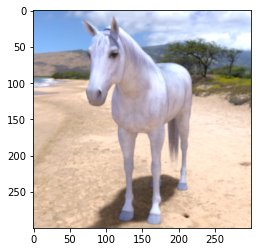

Image name horse01-0.png


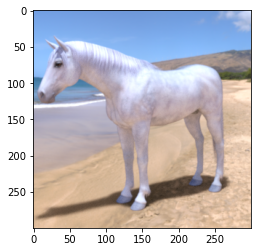

Image name horse01-1.png


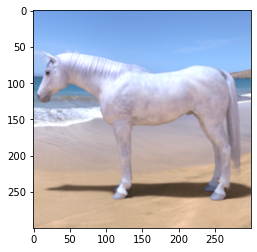

Image name horse01-2.png


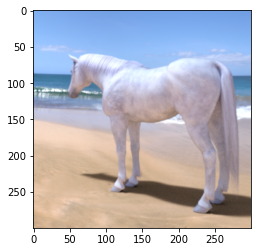

Image name horse01-3.png


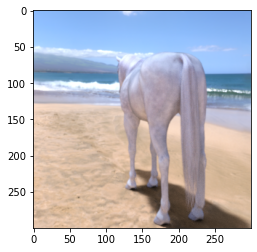

Image name horse01-4.png


In [6]:
show_five_images(train_horse_dir)

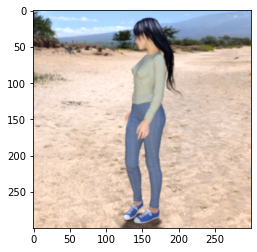

Image name human01-00.png


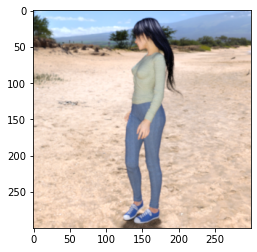

Image name human01-01.png


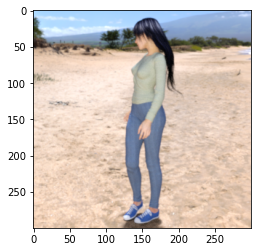

Image name human01-02.png


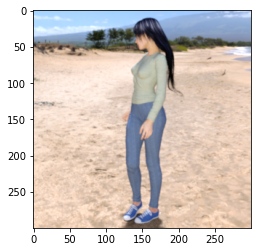

Image name human01-03.png


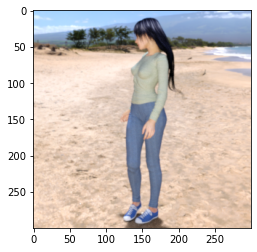

Image name human01-04.png


In [7]:
show_five_images(train_human_dir)

In [8]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
                                './horse-or-human/',
                                target_size = (300, 300),
                                batch_size = 128,
                                class_mode = 'binary')


val_datagen = ImageDataGenerator(rescale = 1/255)

val_generator = train_datagen.flow_from_directory(
                                './validation-horse-or-human/',
                                target_size = (300, 300),
                                batch_size = 32,
                                class_mode = 'binary')



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
model = keras.Sequential([
    
    #CNN1
    layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu', input_shape = (300, 300, 3)),
    layers.MaxPooling2D(pool_size = 2),
    
    #CNN2
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    
    #CNN3
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    
    #CNN4
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    
    #CNN5
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    
    #Flatten
    layers.Flatten(),
    
    #Dense layers
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer="RMSprop",
              metrics=['accuracy'])

In [14]:
history = model.fit(train_generator, steps_per_epoch = 8, epochs = 15, validation_data = val_generator, validation_steps = 8)

Epoch 1/15
8/8 [==============================] - 98s 10s/step - loss: 0.7581 - accuracy: 0.5050 - val_loss: 0.6815 - val_accuracy: 0.5430
Epoch 2/15
8/8 [==============================] - 64s 8s/step - loss: 0.6683 - accuracy: 0.5918 - val_loss: 0.6216 - val_accuracy: 0.5586
Epoch 3/15
8/8 [==============================] - 64s 8s/step - loss: 0.5544 - accuracy: 0.7419 - val_loss: 6.6132 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 61s 7s/step - loss: 0.9135 - accuracy: 0.8042 - val_loss: 0.7296 - val_accuracy: 0.6016
Epoch 5/15
8/8 [==============================] - 58s 7s/step - loss: 0.7892 - accuracy: 0.8476 - val_loss: 0.4424 - val_accuracy: 0.8477
Epoch 6/15
8/8 [==============================] - 58s 7s/step - loss: 0.1689 - accuracy: 0.9399 - val_loss: 2.6143 - val_accuracy: 0.6445
Epoch 7/15
8/8 [==============================] - 58s 8s/step - loss: 0.2018 - accuracy: 0.9277 - val_loss: 0.5333 - val_accuracy: 0.8047
Epoch 8/15
8/8 [=================

In [19]:
test_img = 'H:\wallpapers\download4\Amy adams g2.jpg'
img = load_img(test_img , target_size=(300, 300))
x = img_to_array(img)
x /= 255
print('Shape before', x.shape)
x = np.expand_dims(x, axis = 0)
print('Shape after expand', x.shape)
classes = model.predict([x], batch_size=10)
classes


Shape before (300, 300, 3)
Shape after expand (1, 300, 300, 3)
1/1 [==============================] - 0s 31ms/step


array([[0.60470223]], dtype=float32)

In [23]:
def predict_image(image_path):
    img = load_img(image_path , target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis = 0)
    classes = model.predict([x], batch_size=10)
    if classes[0] > 0.5:
        print('Human')
    else:
        print('Horse')
    img = mpimg.imread(image_path)
    plt.imshow(img)
        

1/1 [==============================] - 0s 31ms/step
Horse


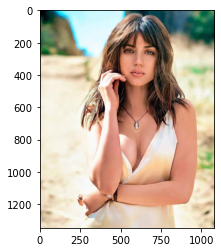

In [24]:
predict_image(r'H:\wallpapers\download4\ana de armas pe.jpg')

1/1 [==============================] - 0s 41ms/step
Human


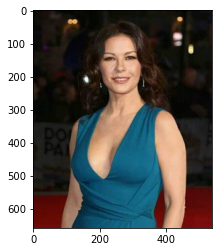

In [25]:
predict_image(r'H:\wallpapers\download4\Catherine Zeta Jones b2.jpg')

1/1 [==============================] - 0s 47ms/step
Human


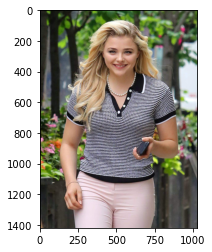

In [29]:
predict_image(r'H:\wallpapers\download4\Chloe Grace mortez gp.jpg')

1/1 [==============================] - 0s 30ms/step
Horse


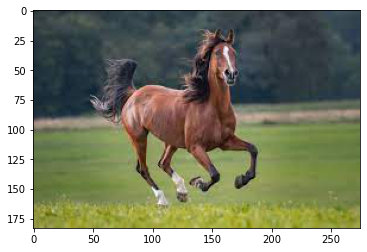

In [26]:
predict_image(r'H:\wallpapers\download3\horse1.jpg')

1/1 [==============================] - 0s 38ms/step
Horse


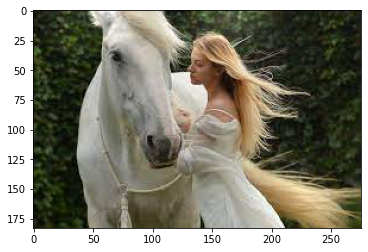

In [27]:
predict_image(r'H:\wallpapers\download3\horse2.jpg')